In [6]:

import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
from pathlib import Path
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T


%matplotlib inline

In [35]:
len(os.listdir("datasets/data/VOCdevkit/VOC2012/JPEGImages"))

17125

In [36]:
len(os.listdir("datasets/data/VOCdevkit/VOC2012/SegmentationClass"))

2913

In [37]:
Image.open("datasets/data/VOCdevkit/VOC2012/SegmentationObject/2011_003205.png").size


(500, 329)

In [10]:
len(os.listdir("/mnt/raid/home/eyal_michaeli/git/instruct-pix2pix/datasets/pascal/pascal_ip2p_2x_constant_instructions_image_w_1.5_with_blip_and_gpt/images")) // 3

2044

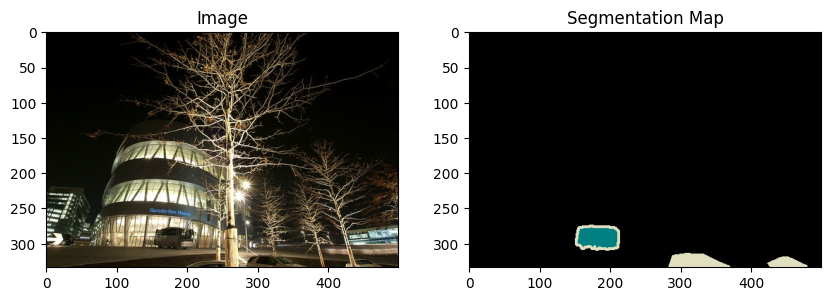

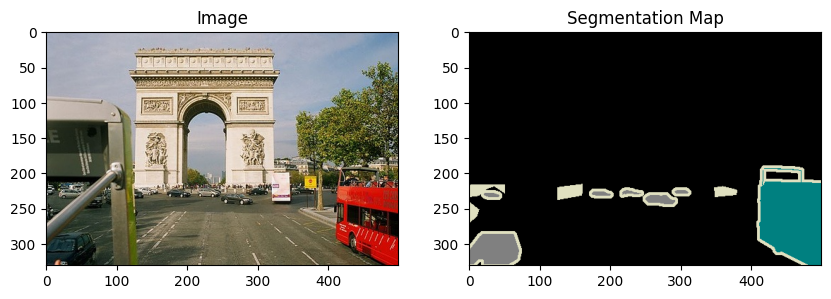

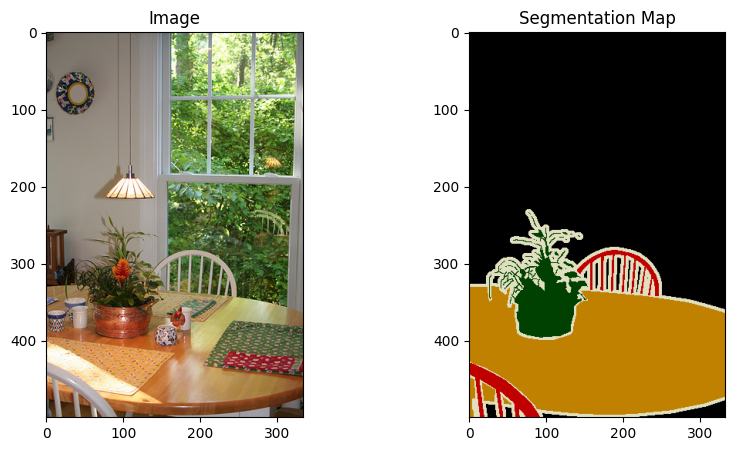

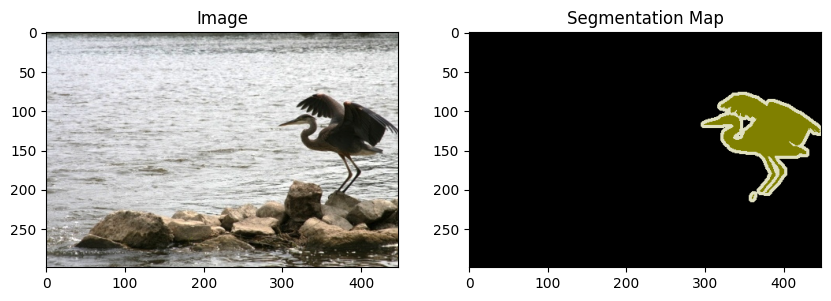

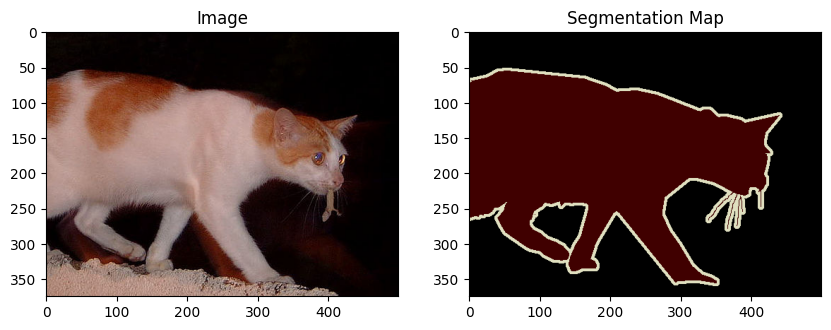

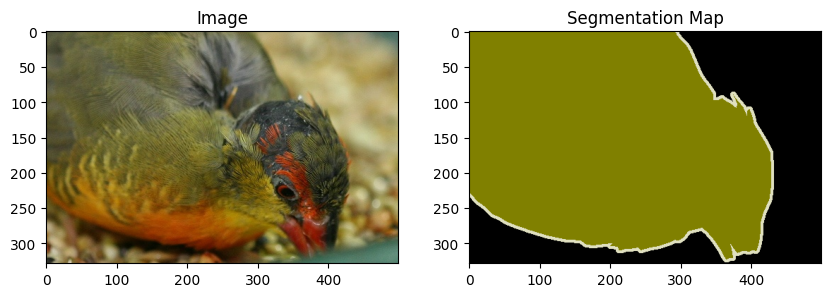

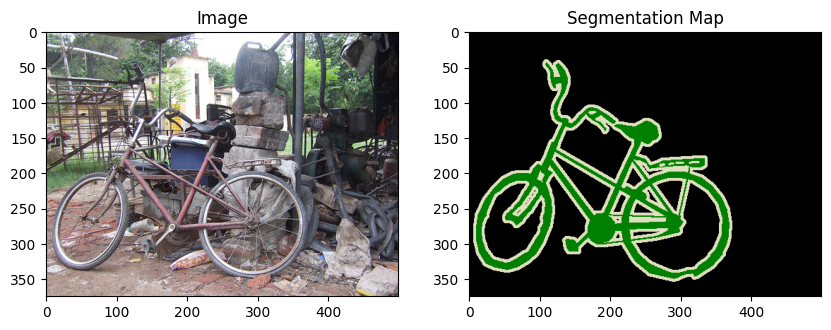

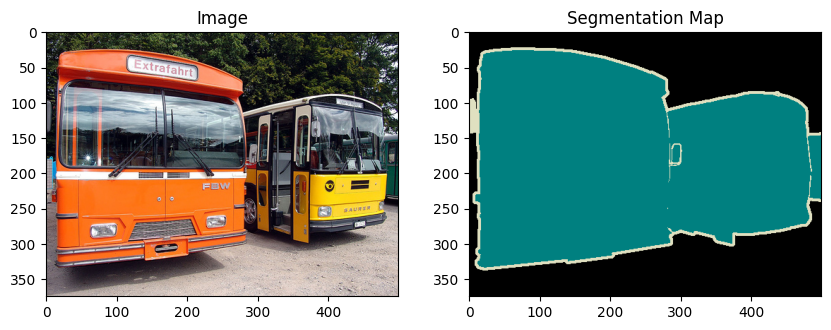

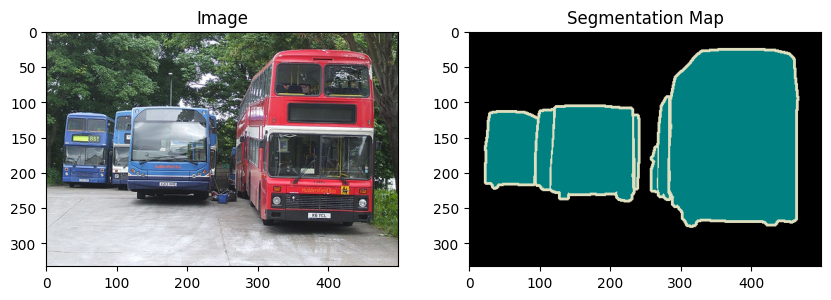

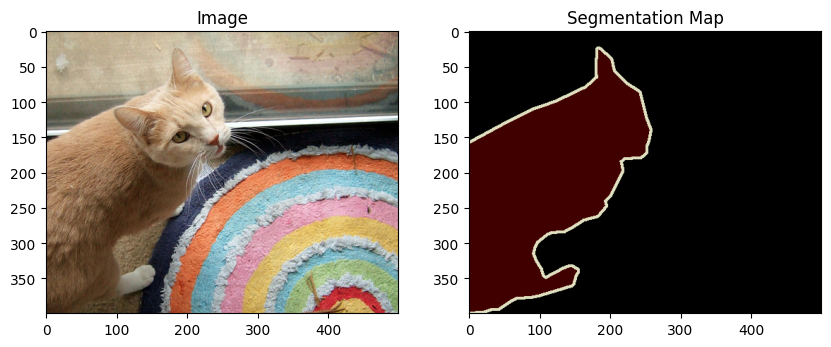

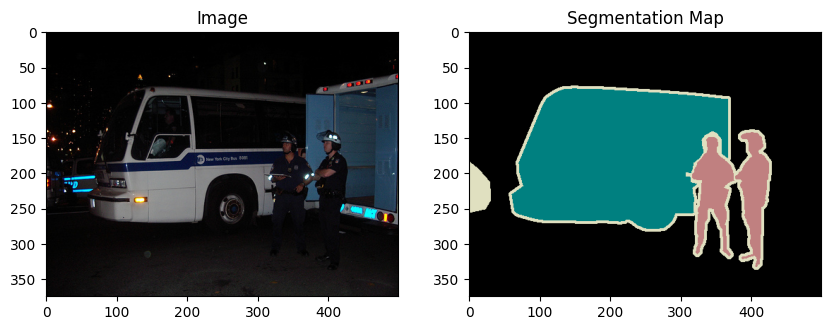

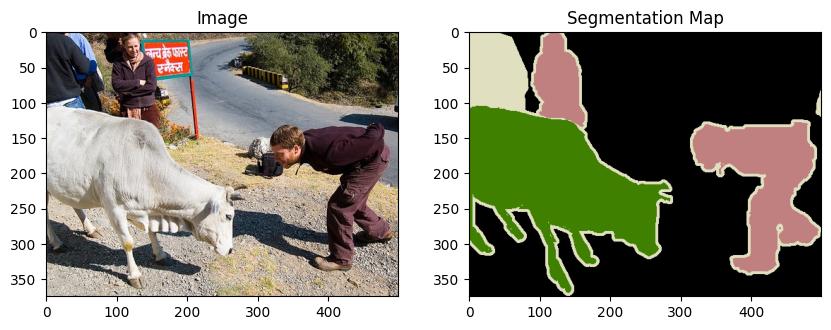

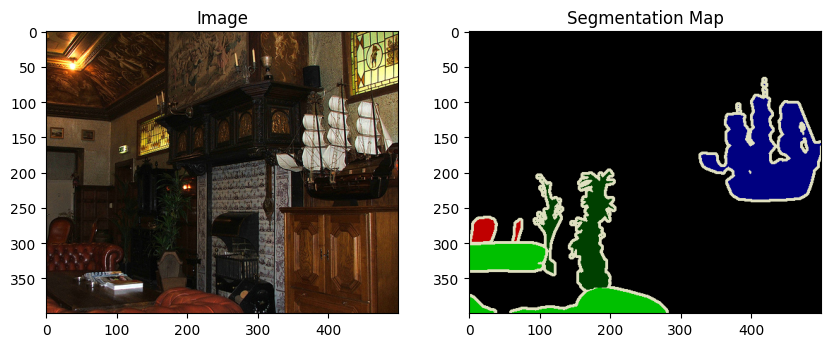

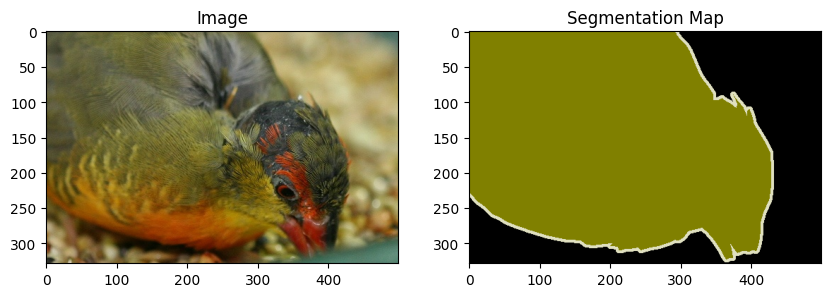

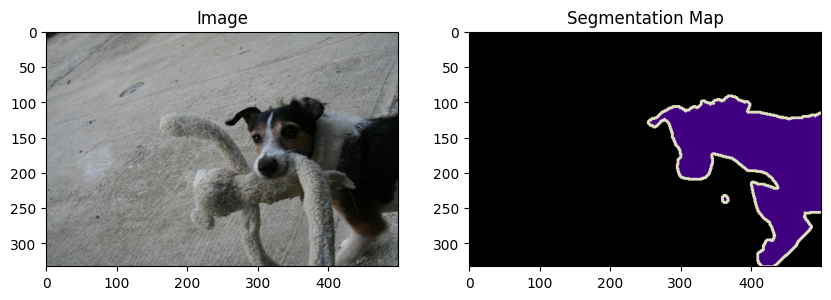

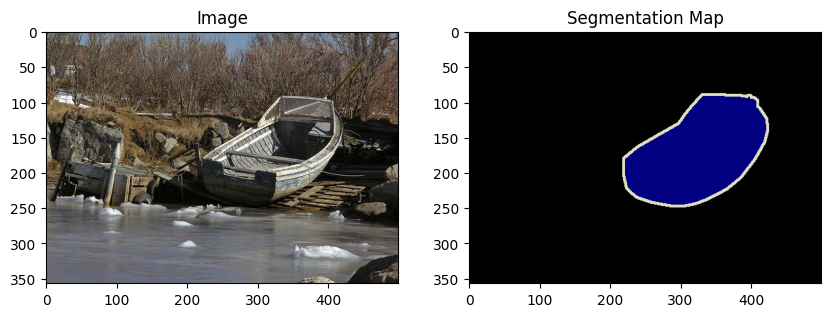

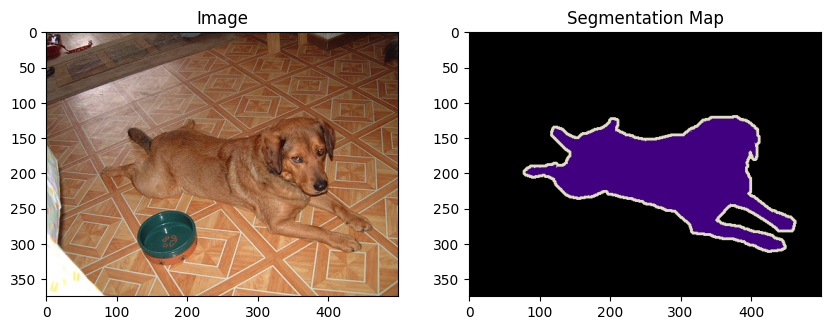

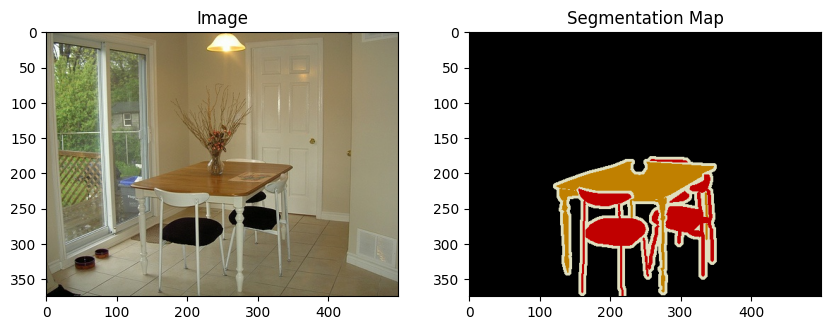

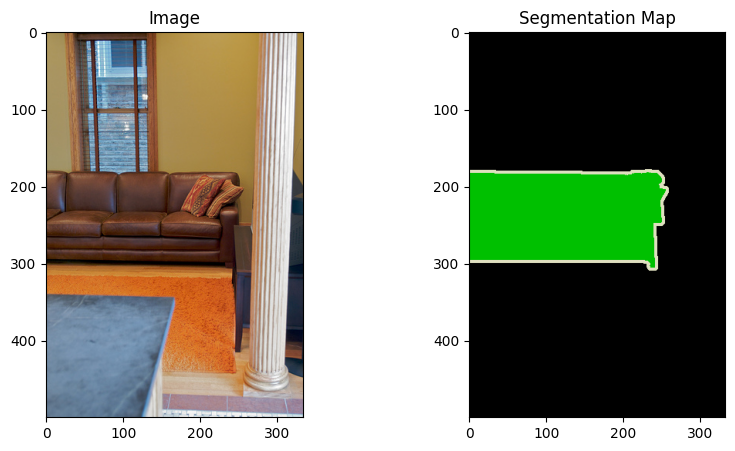

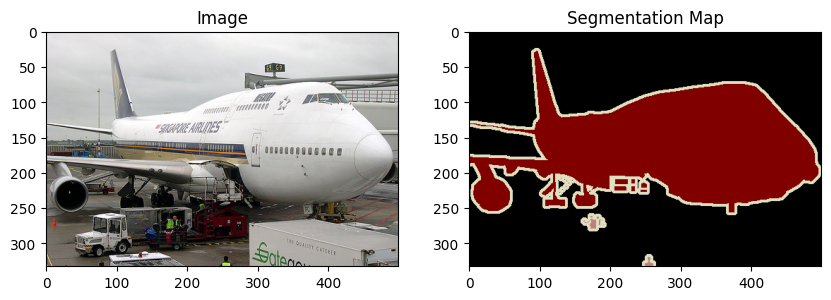

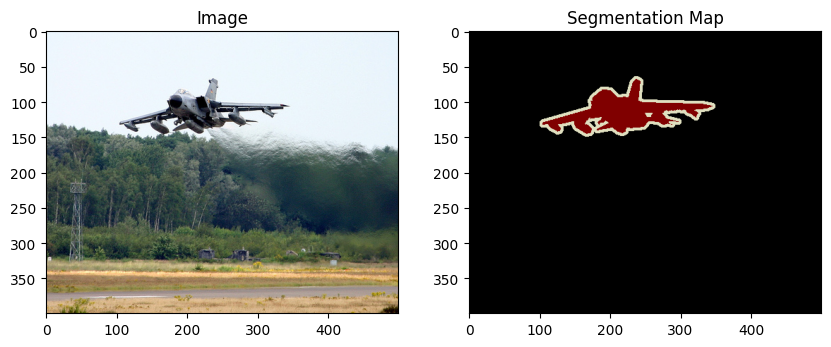

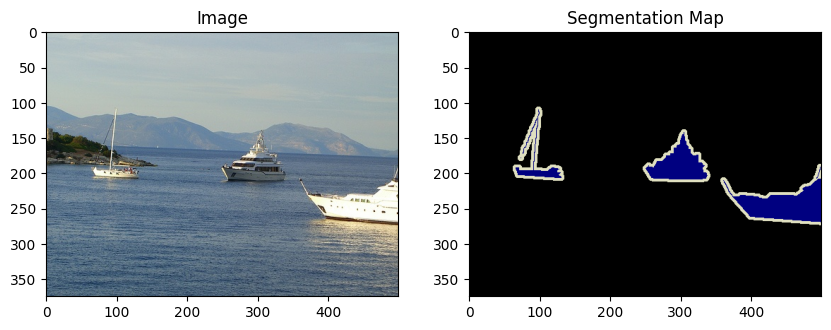

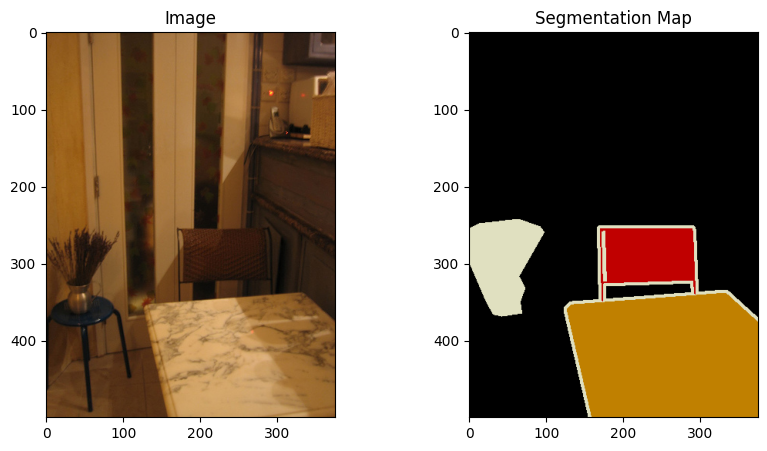

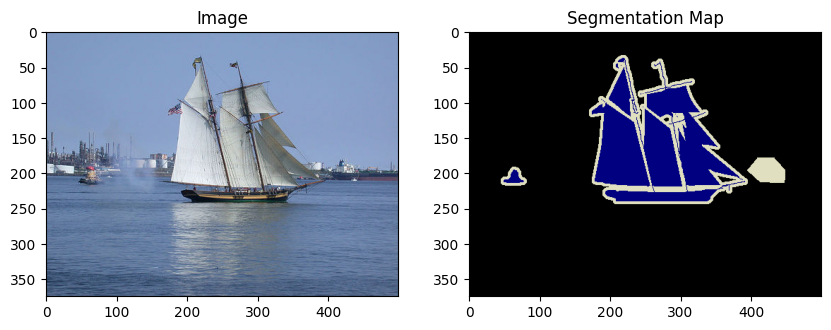

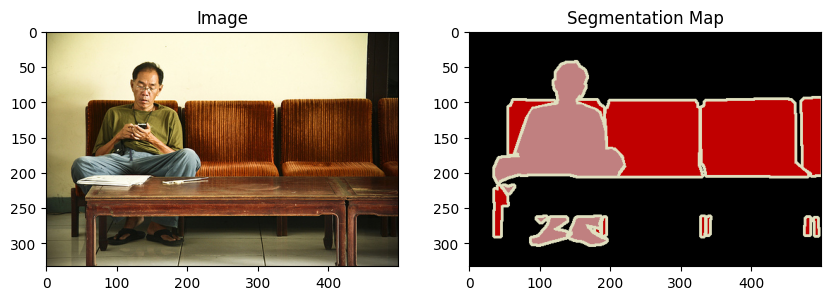

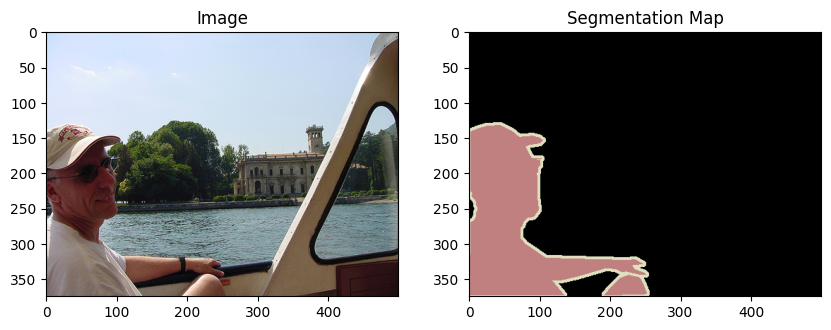

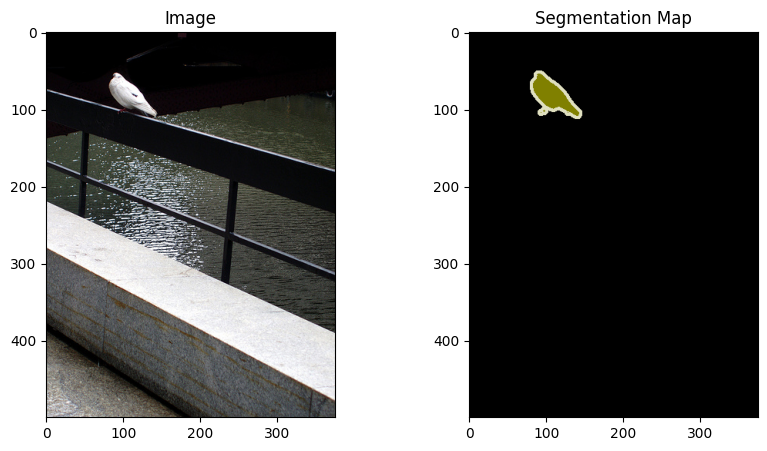

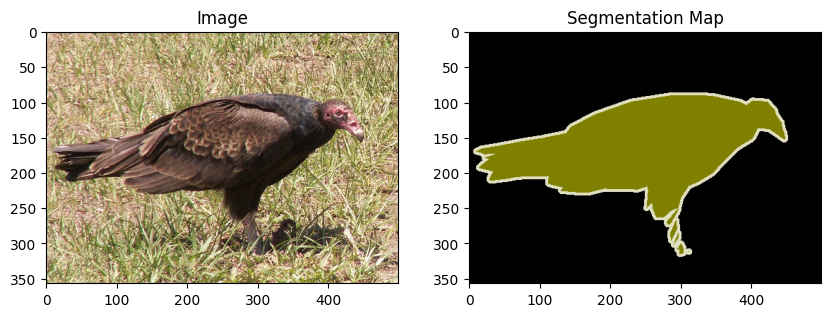

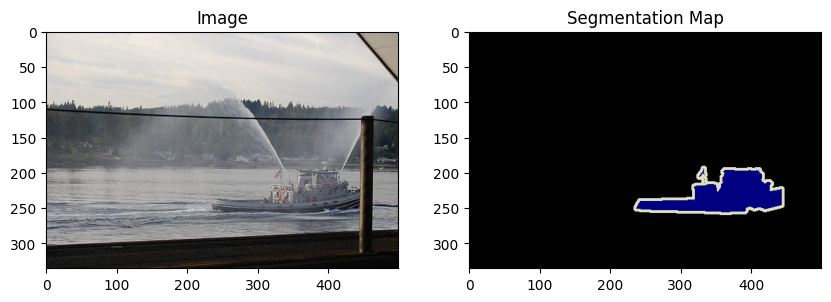

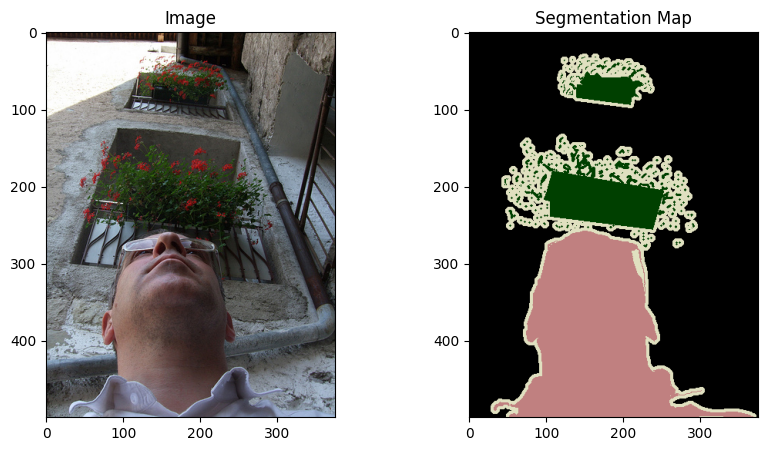

In [8]:
# plot image and its seg map side by side for the voc dataset

class_mapping = {
    0: 'background',
    1: 'aeroplane',
    2: 'bicycle',
    3: 'bird',
    4: 'boat',
    5: 'bottle',
    6: 'bus',
    7: 'car',
    8: 'cat',
    9: 'chair',
    10: 'cow',
    11: 'dining table',
    12: 'dog',
    13: 'horse',
    14: 'motorbike',
    15: 'person',
    16: 'potted plant',
    17: 'sheep',
    18: 'sofa',
    19: 'train',
    20: 'TV monitor'
}


def plot_image_and_seg_map(image_path, seg_map_path):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    image = Image.open(image_path)
    seg_map = Image.open(seg_map_path)
    ax[0].imshow(image)
    ax[1].imshow(seg_map)
    ax[0].set_title('Image')
    classes = np.unique(np.array(seg_map))
    classes_names = [class_mapping[clas] for clas in classes if clas not in (255,)]
    ax[1].set_title(f"Seg Map, classes: {', '.join(classes_names)}")
    plt.show()


voc_root = '/mnt/raid/home/eyal_michaeli/git/DeepLabV3Plus-Pytorch/datasets/data/VOCdevkit/VOC2012/'

# plot a random image and its seg map, pick a random seg map and its corresponding image
image_dir = os.path.join(voc_root, 'JPEGImages')
seg_map_dir = os.path.join(voc_root, 'SegmentationClass')


for _ in range(30):
    seg_map_path = random.choice(os.listdir(seg_map_dir))
    image_path = os.path.join(image_dir, seg_map_path[:-4] + '.jpg')
    seg_map_path = os.path.join(seg_map_dir, seg_map_path)


    plot_image_and_seg_map(image_path, seg_map_path)
